# HW 3: Classify the Digits Data Set & Reduce its Dimensionality 

Blanca Miller
STAT 760
02/15/2018

Objective: Given the MNIST data set, reduce the dimensionality of the data using eigenvalues, and classify the data according to the chosen features (max eigenvalues chosen).


## STEPS

1. Import digits training and testing data sets.
2. Run pca: compute the eigenvalues for the data set. 
3. Choose principal components. 
4. Compute mean for each class.
5. Compute covariance for each class.
6. For new points, compute the probablity of beloging to each classes using the mahalanobis distance. 

## Data Set 
- Each datapoint is a 8x8 image of a digit.
- 10 classes
- ~180 samples per class
- 1797 total samples
- Integers 0-16 

## Imports

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition, datasets, preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB

## Import Data & Set Training and Test Sets

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)
print("Digits Data: {}".format(digits.data.shape))
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

Digits Data: (1797, 64)
X_train: (1203, 64)
y_train: (1203,)
X_test: (594, 64)
y_test: (594,)


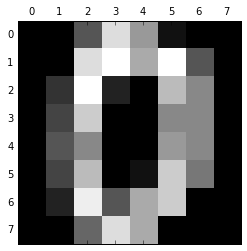

In [3]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

## Standardize Data & Run PCA

In [4]:
# Standardize training set
X_train = preprocessing.scale(X_train) 
print(X_train)

# Run PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)

[[ 0.         -0.35276262 -1.07887239 ...,  1.06058522 -0.505317
  -0.19535349]
 [ 0.         -0.35276262 -0.87246598 ...,  0.03591595 -0.505317
  -0.19535349]
 [ 0.          0.72432731  1.39800449 ..., -1.15953153 -0.505317
  -0.19535349]
 ..., 
 [ 0.         -0.35276262  0.77878527 ...,  1.57291985 -0.02285958
  -0.19535349]
 [ 0.         -0.35276262 -0.87246598 ..., -1.15953153 -0.505317
  -0.19535349]
 [ 0.         -0.35276262 -0.87246598 ..., -0.98875332 -0.505317
  -0.19535349]]


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Plot PCA

(0.0, 1.0, 5.8000000000000007, 7.6000000000000005)

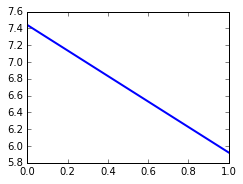

In [5]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7]) # check if these are set correctly
plt.plot(pca.explained_variance_, linewidth=2) 
plt.axis()

## Compute Mean & Stardard Deviation for Each Class

In [7]:
# Reduce Dimensionality of Data
pcas = [decomposition.PCA(n_components=k) for k in range(0,10)]
means = np.zeros((10, 10))
standard_devs = np.zeros((10, 10))
for k in range(1,10):
    x_reduced = pcas[k].fit_transform(X_train)
    x_reduced.mean(axis=0)
    x_reduced.std(axis=0)
print(x_reduced)

[[ 1.99045734  1.43807137 -0.51811749 ...,  3.23704678  1.12072065
  -0.43302576]
 [-0.79074114  1.15429971 -4.4498883  ..., -1.00965238 -0.07501145
   1.47992984]
 [-2.54622066  2.27747987 -1.32471324 ..., -0.93473003 -0.49007804
   0.08429554]
 ..., 
 [-1.67418871  2.28315405 -0.36096841 ..., -3.08454413  1.11995801
   0.49412231]
 [ 1.66920345  1.83447617 -0.15898625 ..., -0.42579736  1.11555181
   0.07653046]
 [ 0.31276722 -0.15285234 -4.48961499 ..., -0.6737512  -0.93615565
   1.62699766]]
